In [2]:
import time
import os
import librosa
import numpy as np
import tensorflow

In [3]:
### SEED configuration
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

#### Modeling by using MFCCs with smaller and bigger time-average MFCCs (Classic Ensemble Methods)

The MFCC are given by the spectrogram's compression over the frequency range by using mel filters. 
Mel filters are based on the frequency response of the human ear. The objective is  trying to mimic our frequency response by using simple triangular filters. As a result of this process we obtain an image. 

The horizontal axis represents the time, and the vertical axis represents the frequency domain in mel scale. 
The preprocessed data is an average over the time, by summing up the frequecies dividing by the total time. Besides, it is possible to apply log function to the spectrum. Finally, we obtained a vector which represent into a one dimensional space the mel frequency cepstral coeficients (MFCCs). 


As a first approach I'm going to implement random forest classifiers with 12 features by vector, and other random forest model with 40 features by vector, in order to compare the dimension relevance. 

Note that all this hyphothesis are related to ML models for a multiclass classification problem (ensemble models). 

**Hypothesis 1**: Bigger models have a better accuracy. **$\color{red}{\text{True}}$**

**Hypothesis 2**: Applying log to the spectrum improve the accuracy. **$\color{red}{\text{False}}$**

**Hypothesis 3**: Data augmentation improves the performance. **$\color{red}{\text{True}}$**

**Comparisons**: between ensemble models. Random forest, decision trees, and adaboost. 

#### Loading the data

In [3]:
filename = '../processed_data/mfccs_big_and_small.npy'
with open(filename, 'rb') as f:
    Xb = np.load(f)
    yb = np.load(f)
    Xs = np.load(f)
    ys = np.load(f)
    Xbl = np.load(f)
    ybl = np.load(f)
    Xsl = np.load(f)
    ysl = np.load(f)
# Check that we've recovered the right data
print(f'Xb:{Xb.shape}, yb:{yb.shape}')
print(f'Xs:{Xs.shape}, ys:{ys.shape}')
print(f'Xbl:{Xbl.shape}, ybl:{ybl.shape}')
print(f'Xsl:{Xsl.shape}, ysl:{ysl.shape}')

Xb:(1440, 40), yb:(1440,)
Xs:(1440, 12), ys:(1440,)
Xbl:(1440, 40), ybl:(1440,)
Xsl:(1440, 12), ysl:(1440,)


#### Split the data

I decided in this group of experiments using 90%-10% split ratio between train-test sets. The data obtained in the split process will be used for train diferent deep learning models at the end. 

In [8]:
from sklearn.model_selection import train_test_split

In [5]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(Xb, yb, test_size=0.10, random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs, ys, test_size=0.10, random_state=42)

### Machine Learning Models: Ensembles

#### Trainig the models

In this first approach I'm not including audio augmentation by using Gaussian noise or changing pitch. 
The baseline models are:

1- Decision Tree

2- Random Forest

3- AdaBoost

The evaluation is implemented in the fiel called ```eval_classifiers.py```. Initially, the classifiers doesn't have any parameter adjustment. 

In [11]:
from eval_classifiers import EvalClassifiers
from eval_classifiers import EvalBestModel

Training the models with a small number of features, using stratified k-fold and balanced accuracy score as a first performance metric.

In [7]:
results_small_ensembles = EvalClassifiers("small_ensembles", Xs, ys, n_splits=10)

In [8]:
results_small_ensembles

,Random Forest,AdaBoost,DecisionTree
0,0.535197,0.297368,0.432895
0,0.636842,0.358224,0.435197
0,0.609539,0.264474,0.297697
0,0.505592,0.295395,0.363158
0,0.558224,0.299671,0.314145
0,0.610526,0.275329,0.428947
0,0.500621,0.343238,0.380227
0,0.479678,0.259868,0.339291
0,0.530629,0.361148,0.341338
0,0.497661,0.334503,0.445760


In [9]:
results_small_ensembles.to_csv('results/small_ensembles.csv',index=False)

In [10]:
results_big_ensembles = EvalClassifiers("big_ensembles", Xb, yb, n_splits=10)

In [11]:
results_big_ensembles

,Random Forest,AdaBoost,DecisionTree
0,0.520066,0.267434,0.370724
0,0.581579,0.358224,0.360855
0,0.682895,0.289803,0.467434
0,0.528947,0.247039,0.377303
0,0.551645,0.342763,0.331908
0,0.558553,0.301316,0.397039
0,0.586221,0.299232,0.398246
0,0.581287,0.297770,0.390607
0,0.582602,0.254349,0.365205
0,0.633260,0.321418,0.469956


In [12]:
results_big_ensembles.to_csv('results/big_ensembles.csv',index=False)

In [13]:
results_small_ensembles_log = EvalClassifiers("small_ensembles_log", Xsl, ysl, n_splits=10)

In [14]:
results_small_ensembles_log

,Random Forest,AdaBoost,DecisionTree
0,0.435855,0.280263,0.261184
0,0.500987,0.313158,0.381908
0,0.453618,0.286513,0.323355
0,0.415789,0.318421,0.362500
0,0.415789,0.260855,0.234868
0,0.351974,0.265132,0.272697
0,0.403436,0.304678,0.264145
0,0.376864,0.240863,0.282273
0,0.363889,0.338633,0.279020
0,0.424306,0.253289,0.310526


In [15]:
results_small_ensembles_log.to_csv('results/small_ensembles_log.csv',index=False)

In [16]:
results_big_ensembles_log = EvalClassifiers("big_ensembles_log", Xbl, ybl, n_splits=10)

In [17]:
results_big_ensembles_log

,Random Forest,AdaBoost,DecisionTree
0,0.436184,0.339474,0.313487
0,0.462171,0.312829,0.339803
0,0.411184,0.279276,0.338816
0,0.450000,0.339803,0.330921
0,0.453618,0.313158,0.311184
0,0.422697,0.258882,0.333224
0,0.409759,0.366009,0.324415
0,0.460015,0.259284,0.305080
0,0.429825,0.279020,0.332054
0,0.474817,0.305665,0.274488


In [18]:
results_big_ensembles_log.to_csv('results/big_ensembles_log.csv',index=False)

### Visualizing the Results

Using normalized and averaged mel-spectrograms

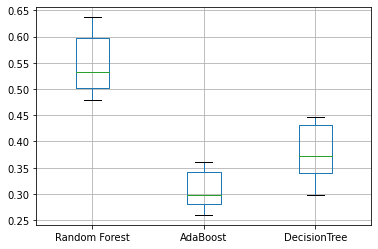

In [19]:
boxplot = results_small_ensembles.boxplot(column=["Random Forest", "AdaBoost", "DecisionTree"])

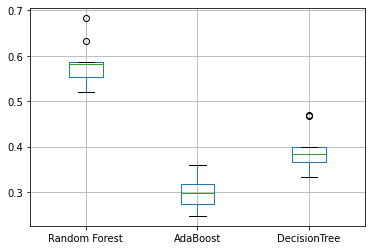

In [20]:
boxplot = results_big_ensembles.boxplot(column=["Random Forest", "AdaBoost", "DecisionTree"])

Using normalized, averaged and log mel-spectrograms

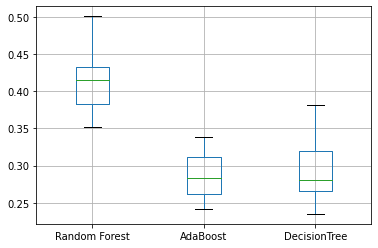

In [21]:
boxplot = results_small_ensembles_log.boxplot(column=["Random Forest", "AdaBoost", "DecisionTree"])

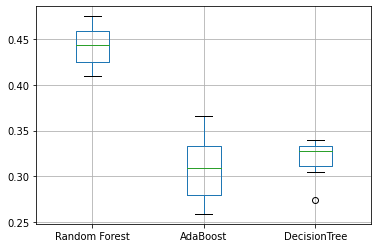

In [22]:
boxplot = results_big_ensembles_log.boxplot(column=["Random Forest", "AdaBoost", "DecisionTree"])

**First Conclusion**: the best default model was Random Forest, using the mel vectors with 40 features (big model). 

In [23]:
import pandas as pd

In [24]:
best_1 = results_small_ensembles["Random Forest"]
best_2 = results_big_ensembles["Random Forest"]

In [25]:
b1 = np.asarray(best_1)
b2 = np.asarray(best_2)
B = np.asarray([b1,b2]).T

In [26]:
B.shape

(10, 2)

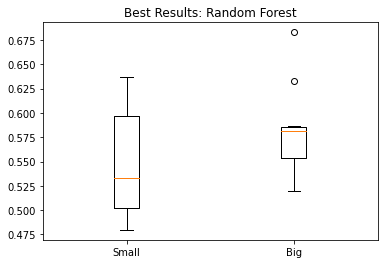

In [27]:
import matplotlib.pyplot as plt
fig7, ax7 = plt.subplots()
ax7.set_title('Best Results: Random Forest')
ax7.boxplot(B)
plt.xticks([1, 2], ['Small', 'Big'])
plt.show()

### Training using 90%-10% train-test sets: 12 and 40 features without log. 

In [28]:
from eval_classifiers import EvalClassifiers_9010

In [29]:
s_9010 = EvalClassifiers_9010('small_9010', X_train_s, y_train_s, X_test_s, y_test_s)

Random Forest
              precision    recall  f1-score   support

           1       0.62      0.56      0.59         9
           2       0.69      0.80      0.74        25
           3       0.53      0.53      0.53        19
           4       0.38      0.42      0.40        12
           5       0.79      0.61      0.69        18
           6       0.65      0.61      0.63        18
           7       0.60      0.67      0.63        18
           8       0.58      0.56      0.57        25

    accuracy                           0.61       144
   macro avg       0.61      0.59      0.60       144
weighted avg       0.62      0.61      0.61       144

 
AdaBoost
              precision    recall  f1-score   support

           1       0.22      0.22      0.22         9
           2       0.43      0.40      0.42        25
           3       0.23      0.16      0.19        19
           4       0.08      0.08      0.08        12
           5       0.27      0.67      0.38        18

In [30]:
s_9010

,Random Forest,AdaBoost,DecisionTree
0,0.593428,0.283765,0.360482


In [31]:
b_9010 = EvalClassifiers_9010('big_9010', X_train_b, y_train_b, X_test_b, y_test_b)

Random Forest
              precision    recall  f1-score   support

           1       0.54      0.78      0.64         9
           2       0.77      0.96      0.86        25
           3       0.59      0.53      0.56        19
           4       0.58      0.58      0.58        12
           5       0.65      0.61      0.63        18
           6       0.75      0.83      0.79        18
           7       0.58      0.61      0.59        18
           8       0.87      0.52      0.65        25

    accuracy                           0.68       144
   macro avg       0.67      0.68      0.66       144
weighted avg       0.69      0.68      0.67       144

 
AdaBoost
              precision    recall  f1-score   support

           1       0.24      0.44      0.31         9
           2       0.64      0.56      0.60        25
           3       0.33      0.26      0.29        19
           4       0.00      0.00      0.00        12
           5       0.30      0.72      0.43        18

In [32]:
b_9010 

,Random Forest,AdaBoost,DecisionTree
0,0.677873,0.314284,0.38864


**Until here model using 40 features (bigger models), in particular, Random Forest are better than the others, using default configuration.**

### Training using 90%-10% train-test sets: 12 and 40 features with log. 

In [33]:
X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(Xbl, ybl, test_size=0.10, random_state=42)
X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(Xsl, ysl, test_size=0.10, random_state=42)

In [34]:
sl_9010 = EvalClassifiers_9010('small_log_9010', X_train_sl, y_train_sl, X_test_sl, y_test_sl)

Random Forest
              precision    recall  f1-score   support

           1       0.57      0.44      0.50         9
           2       0.58      0.56      0.57        25
           3       0.50      0.53      0.51        19
           4       0.32      0.50      0.39        12
           5       0.62      0.72      0.67        18
           6       0.62      0.56      0.59        18
           7       0.59      0.56      0.57        18
           8       0.55      0.44      0.49        25

    accuracy                           0.54       144
   macro avg       0.54      0.54      0.54       144
weighted avg       0.55      0.54      0.54       144

 
AdaBoost
              precision    recall  f1-score   support

           1       0.11      0.11      0.11         9
           2       0.42      0.44      0.43        25
           3       0.33      0.26      0.29        19
           4       0.09      0.08      0.09        12
           5       0.28      0.39      0.33        18

In [35]:
bl_9010 = EvalClassifiers_9010('big_log_9010', X_train_bl, y_train_bl, X_test_bl, y_test_bl)

Random Forest
              precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.61      0.76      0.68        25
           3       0.67      0.63      0.65        19
           4       0.50      0.50      0.50        12
           5       0.86      0.67      0.75        18
           6       0.71      0.67      0.69        18
           7       0.54      0.72      0.62        18
           8       0.80      0.64      0.71        25

    accuracy                           0.67       144
   macro avg       0.68      0.66      0.66       144
weighted avg       0.68      0.67      0.67       144

 
AdaBoost
              precision    recall  f1-score   support

           1       0.25      0.22      0.24         9
           2       0.44      0.44      0.44        25
           3       0.33      0.32      0.32        19
           4       0.09      0.17      0.11        12
           5       0.17      0.22      0.19        18

**Again Random Forest Model using 40 features (bigger) obtain better results without log the amplitude, and using default configuration.**

### First Conclusions

Until here **Hypothesis 1** was confirmed: models using more features obtain better results. Random Forest was the best model using balanced accuracy and other average metrics. 

**Hypothesis 2** was not true, the performance is worse in some cases. 

## Applying Data Augmentation

Con audio a 48 KHz

In [4]:
filename = '../processed_data/MFCCs_AUGMENTED_48.npy'
# open file in write mode and write data
with open(filename, 'rb') as f:
    F12 = np.load(f)
    F40 = np.load(f)
    Y = np.load(f)

Loading the mel-spectrograms augmented for 12 and 40 bins. 

In [7]:
print(F12.shape)
print(F40.shape)
print(Y.shape)

(5760, 12)
(5760, 40)
(5760,)


In [15]:
X_train_aug_12, X_test_aug_12, y_train_aug_12, y_test_aug_12 = train_test_split(F12, Y, test_size=0.05, random_state=42)

In [16]:
results_small_ensemble_48 = EvalClassifiers("small_ensemble_48", X_train_aug_12, y_train_aug_12, n_splits=10)

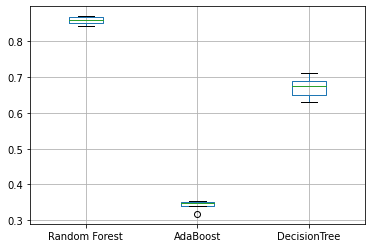

In [17]:
boxplot = results_small_ensemble_48.boxplot(column=["Random Forest", "AdaBoost", "DecisionTree"])

In [14]:
results_small_ensemble_48

,Random Forest,AdaBoost,DecisionTree
0,0.866566,0.351959,0.687269
0,0.826845,0.321767,0.665023
0,0.873605,0.324258,0.669928
0,0.829361,0.355138,0.668363
0,0.854400,0.331310,0.659506
0,0.880558,0.312094,0.673985
0,0.867894,0.353494,0.681779
0,0.859343,0.384646,0.659505
0,0.851654,0.339352,0.664188
0,0.847408,0.345353,0.654221


In [24]:
results_small_ensemble_48.describe()

,Random Forest,AdaBoost,DecisionTree
count,10.000000,10.000000,10.000000
mean,0.858554,0.343316,0.671268
std,0.010629,0.010577,0.026841
min,0.842286,0.317702,0.629895
25%,0.852351,0.338893,0.650105
50%,0.860642,0.346867,0.674835
75%,0.867389,0.350493,0.689598
max,0.870220,0.352678,0.711355


In [20]:
X_train_aug_40, X_test_aug_40, y_train_aug_40, y_test_aug_40 = train_test_split(F40, Y, test_size=0.05, random_state=42)

In [21]:
results_big_ensemble_48 = EvalClassifiers("big_ensemble_48", X_train_aug_40, y_train_aug_40, n_splits=10)

In [23]:
results_big_ensemble_48

,Random Forest,AdaBoost,DecisionTree
0,0.859751,0.380280,0.639062
0,0.849448,0.370243,0.661290
0,0.864742,0.356757,0.631843
0,0.839194,0.375495,0.659444
0,0.841920,0.376413,0.607403
0,0.870863,0.363827,0.660727
0,0.869717,0.355620,0.600546
0,0.863011,0.336847,0.619800
0,0.867797,0.367650,0.631607
0,0.879044,0.336916,0.635092


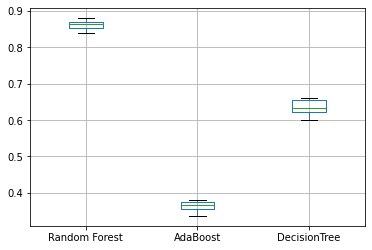

In [22]:
boxplot = results_big_ensemble_48.boxplot(column=["Random Forest", "AdaBoost", "DecisionTree"])

In [25]:
results_big_ensemble_48.describe()

,Random Forest,AdaBoost,DecisionTree
count,10.000000,10.000000,10.000000
mean,0.860549,0.362005,0.634681
std,0.013062,0.015482,0.021518
min,0.839194,0.336847,0.600546
25%,0.852023,0.355904,0.622752
50%,0.863877,0.365739,0.633467
75%,0.869237,0.374182,0.654349
max,0.879044,0.380280,0.661290


A 48 KHz es mejor el resultado obtenido con 40 features provenientes del MFCCs!

Con audio a 22 KHz

In [26]:
filename = '../processed_data/MFCCs_AUGMENTED_22.npy'
# open file in write mode and write data
with open(filename, 'rb') as f:
    F12 = np.load(f)
    F40 = np.load(f)
    Y = np.load(f)

In [27]:
X_train_aug_12, X_test_aug_12, y_train_aug_12, y_test_aug_12 = train_test_split(F12, Y, test_size=0.05, random_state=42)

In [28]:
results_small_ensemble_22 = EvalClassifiers("small_ensemble_22", X_train_aug_12, y_train_aug_12, n_splits=10)

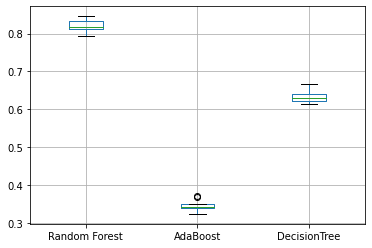

In [29]:
boxplot = results_small_ensemble_22.boxplot(column=["Random Forest", "AdaBoost", "DecisionTree"])

In [30]:
results_small_ensemble_22.describe()

,Random Forest,AdaBoost,DecisionTree
count,10.000000,10.000000,10.000000
mean,0.821564,0.344968,0.633346
std,0.016736,0.015225,0.015959
min,0.793242,0.323484,0.613878
25%,0.812845,0.337970,0.621247
50%,0.818462,0.342394,0.630618
75%,0.833517,0.349642,0.641575
max,0.845670,0.370181,0.666438


In [31]:
X_train_aug_40, X_test_aug_40, y_train_aug_40, y_test_aug_40 = train_test_split(F40, Y, test_size=0.05, random_state=42)

In [32]:
results_big_ensemble_22 = EvalClassifiers("big_ensemble_22", X_train_aug_40, y_train_aug_40, n_splits=10)

In [33]:
results_big_ensemble_22

,Random Forest,AdaBoost,DecisionTree
0,0.809794,0.338799,0.588383
0,0.837743,0.345000,0.596883
0,0.847402,0.355330,0.624876
0,0.832274,0.350594,0.621332
0,0.823320,0.327743,0.564544
0,0.845457,0.364149,0.600901
0,0.825231,0.380768,0.627501
0,0.840533,0.355644,0.614835
0,0.857238,0.379902,0.624752
0,0.839318,0.367484,0.594382


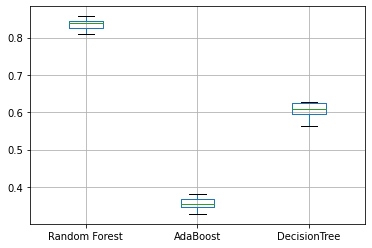

In [34]:
boxplot = results_big_ensemble_22.boxplot(column=["Random Forest", "AdaBoost", "DecisionTree"])

In [35]:
results_big_ensemble_22.describe()

,Random Forest,AdaBoost,DecisionTree
count,10.000000,10.000000,10.000000
mean,0.835831,0.356541,0.605839
std,0.013672,0.017079,0.020429
min,0.809794,0.327743,0.564544
25%,0.826992,0.346399,0.595007
50%,0.838531,0.355487,0.607868
75%,0.844226,0.366650,0.623897
max,0.857238,0.380768,0.627501


Los modelos internamente normalizan las matrices de características! (observación), la función EvalClassifiers contiene la normalización. 

**Conclusion**: A mayor frecuencia de muestreo y a mayor cantidad de bandas mel es mejor el resultado obtenido por random forest!

# Here I explore a hyperparameter tuning alternative: keras_tuner

### Tunning the Hyperparameters: Random Forest with 40 MFCCs

In [36]:
!pip install keras-tuner  # en caso de necesitar instalarlo
import keras_tuner as kt
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

     |████████████████████████████████| 97 kB 910 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [52]:
# Process the data
scaler = StandardScaler()
Xb_augmented = scaler.fit_transform(Xb_augmented )

In [53]:
def build_random_forest(hp):
    model = ensemble.RandomForestClassifier(
        n_estimators=hp.Int('n_estimators', 10, 80, step=5),
        max_depth=hp.Int('max_depth', 5, 30))
    return model

In [54]:
tuner = kt.tuners.Sklearn(
    oracle=kt.oracles.BayesianOptimization(
        objective=kt.Objective('score', 'max'),
        max_trials=15),
    hypermodel= build_random_forest,
    directory='.',
    project_name='random_forest')

INFO:tensorflow:Reloading Oracle from existing project ./random_forest/oracle.json
INFO:tensorflow:Reloading Tuner from ./random_forest/tuner0.json


In [55]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(Xb_augmented, yb_augmented, test_size=0.1, random_state=42)

In [56]:
# X_train_b, X_test_b, y_train_b, y_test_b
tuner.search(X_train_b, y_train_b)
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

INFO:tensorflow:Oracle triggered exit


In [57]:
best_model_results = EvalBestModel(best_model,Xb_augmented, yb_augmented)

/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [58]:
best_model_results

,Best Model
0,0.717874
0,0.732506
0,0.693823
0,0.723001
0,0.717554
0,0.753418
0,0.714536
0,0.670806
0,0.696762
0,0.723833


In [59]:
best_final = best_model_results["Best Model"]

In [60]:
b_final = np.reshape(np.asarray(best_final),(10,1))

In [61]:
B_final = np.hstack((B,b_final))

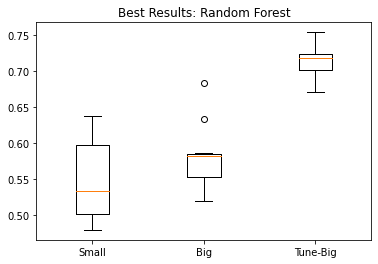

In [62]:
fig7, ax7 = plt.subplots()
ax7.set_title('Best Results: Random Forest')
ax7.boxplot(B_final)
plt.xticks([1, 2,3], ['Small', 'Big','Tuned-Big'])
plt.show()

### Final experiment: using a Random Forest with parameter settings given by an expert!

In [63]:
final_model = ensemble.RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [64]:
final_model_results = EvalBestModel(final_model , Xb_augmented, yb_augmented)

/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [65]:
final_model_results

,Best Model
0,0.597189
0,0.647386
0,0.646446
0,0.585996
0,0.653879
0,0.643968
0,0.647843
0,0.591018
0,0.646643
0,0.615333


In [66]:
expert_final = best_model_results["Best Model"]
e_final = np.reshape(np.asarray(expert_final),(10,1))
B2 = np.hstack((B_final,e_final))

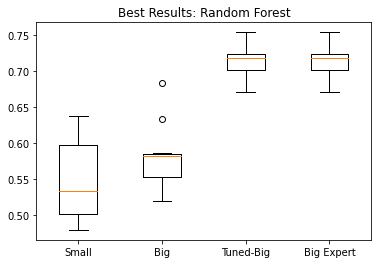

In [67]:
fig7, ax7 = plt.subplots()
ax7.set_title('Best Results: Random Forest')
ax7.boxplot(B2)
plt.xticks([1,2,3,4], ['Small', 'Big','Tuned-Big','Big Expert'])
plt.show()

In [68]:
#criterion="gini", max_depth=10, max_features="log2", 
#                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
#                                 n_estimators= 22000, random_state= 5

In [69]:
def build_random_forest_final(hp):
    model = ensemble.RandomForestClassifier(
        n_estimators=hp.Int('n_estimators', 100,20000 , step=100),
        max_depth=hp.Int('max_depth', 5, 30),
        max_leaf_nodes=hp.Int('max_leaf_nodes', 50, 100),
        min_samples_leaf = hp.Int('min_samples_leaf', 3, 5),
        min_samples_split =hp.Int('min_samples_split', 10, 20) )
    return model

In [70]:
tuner_final = kt.tuners.Sklearn(
    oracle=kt.oracles.BayesianOptimization(
        objective=kt.Objective('score', 'max'),
        max_trials=15),
    hypermodel= build_random_forest_final,
    directory='.',
    project_name='random_forest_final')

INFO:tensorflow:Reloading Oracle from existing project ./random_forest_final/oracle.json
INFO:tensorflow:Reloading Tuner from ./random_forest_final/tuner0.json


In [71]:
tuner_final.search(X_train_b, y_train_b)
best_hp = tuner_final.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner_final.get_best_models(num_models=1)[0]

INFO:tensorflow:Oracle triggered exit


In [72]:
best_model_results_final = EvalBestModel(best_model, Xb_augmented, yb_augmented)

/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = best_model.fit(Xtr,ytr)
/home/src/eval_classifiers.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [73]:
expert_final_2 = best_model_results_final ["Best Model"]
e_final_2 = np.reshape(np.asarray(expert_final_2),(10,1))
B3 = np.hstack((B2,e_final_2))

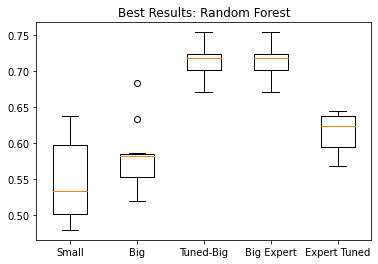

In [75]:
fig7, ax7 = plt.subplots()
ax7.set_title('Best Results: Random Forest')
ax7.boxplot(B3)
plt.xticks([1,2,3,4,5], ['Small', 'Big','Tuned-Big','Big Expert','Expert Tuned'])
plt.show()